![meme](https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/images/fml_09_meme_02.jpg)

# Úovd

Spokojenost zákazníků v leteckém průmyslu je jedním z klíčových faktorů, které ovlivňují loajalitu cestujících a úspěch společnosti. Tento projekt se zaměřuje na analýzu datasetu obsahujícího výsledky průzkumu spokojenosti cestujících. Hlavním cílem je prostřednictvím shlukovací analýzy identifikovat skupiny cestujících s podobnými charakteristikami a odhalit, které faktory mají nejsilnější vliv na jejich spokojenost či nespokojenost.

[Odkaz na dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

[Soubor s zadáním](README.md)

# Načtení knihoven

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor

# Explorační analýza dat (Exploratory Data Analysis - EDA)

In [2]:
df = pd.concat([pd.read_csv("../datasets/projects/train.csv"),
                pd.read_csv("../datasets/projects/test.csv")], ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Popis dat

In [3]:
print(f"Počet řádků: {df.shape[0]}\nPočet atributů: {df.shape[1]}")

Počet řádků: 129880
Počet atributů: 25


In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

### Datový slovník

| Atribut                               | Popis                                                                               | Datový typ |
|:--------------------------------------|:------------------------------------------------------------------------------------|:-----------|
| **Unnamed: 0**                        | Nepojmenovaný sloupec (Index)                                                       | `int64`    |
| **id**                                | ID cestujících                                                                      | `int64`    |
| **Gender**                            | Gender cestujících (Žena, Muž)                                                      | `object`   |
| **Customer Type**                     | Typ zákazníka (Lojální zákazník, Neloajální zákazník)                               | `object`   |
| **Age**                               | Skutečný věk cestujících                                                            | `int64`    |
| **Type of Travel**                    | Účel letu cestujících (Osobní cestování, Obchodní cestování)                        | `object`   |
| **Class**                             | Třída cestování v letadle (Business, Eco, Eco Plus)                                 | `object`   |
| **Flight Distance**                   | Vzdálenost letu této cesty                                                          | `int64`    |
| **Inflight wifi service**             | Úroveň spokojenosti s wifi službami na palubě (0: Neaplikovatelné; 1-5)             | `int64`    |
| **Departure/Arrival time convenient** | Úroveň spokojenosti s pohodlností času odletu/příletu                               | `int64`    |
| **Ease of Online booking**            | Úroveň spokojenosti s online rezervací                                              | `int64`    |
| **Gate location**                     | Úroveň spokojenosti s umístěním brány                                               | `int64`    |
| **Food and drink**                    | Úroveň spokojenosti s jídlem a nápoji                                               | `int64`    |
| **Online boarding**                   | Úroveň spokojenosti s online odbavením                                              | `int64`    |
| **Seat comfort**                      | Úroveň spokojenosti s pohodlím sedadla                                              | `int64`    |
| **Inflight entertainment**            | Úroveň spokojenosti s palubní zábavou                                               | `int64`    |
| **On-board service**                  | Úroveň spokojenosti s obsluhou na palubě                                            | `int64`    |
| **Leg room service**                  | Úroveň spokojenosti s prostorem pro nohy                                            | `int64`    |
| **Baggage handling**                  | Úroveň spokojenosti s manipulací s bagáží                                           | `int64`    |
| **Checkin service**                   | Úroveň spokojenosti s odbavovacími službami                                         | `int64`    |
| **Inflight service**                  | Úroveň spokojenosti s palubními službami                                            | `int64`    |
| **Cleanliness**                       | Úroveň spokojenosti s čistotou                                                      | `int64`    |
| **Departure Delay in Minutes**        | Počet minut zpoždění při odletu                                                     | `int64`    |
| **Arrival Delay in Minutes**          | Počet minut zpoždění při příletu                                                    | `float64`  |
| **Satisfaction**                      | Úroveň spokojenosti s leteckou společností (Spokojenost, Neutralita, Nespokojenost) | `object`   |


### Kontrola duplicitních hodnot

In [6]:
int(df.duplicated().sum())

0

Paráda, v datasetu nejsou žádné duplicitní hodnoty.

### Kontrola chybějících hodnot

In [7]:
columns_with_missing = df.columns[df.isnull().any()]
print(df[columns_with_missing].isnull().sum().apply(
    lambda x: f"{x} / {len(df)} ({(x / len(df) * 100):.2f}%)"))

Arrival Delay in Minutes    393 / 129880 (0.30%)
dtype: object


Máme jen jeden atribut s chybějícími hodnotami. Jedná se o atribut `Arrival Delay in Minutes`. Tento atribut obsahuje *393* hodnot, což představuje *0.30%* z celkového počtu řádků.

Chybějící hodnoty můžeme buď:
- nahradit průměrnou hodnotou
- odstranit chybějící hodnoty

Jelikož se jedná o malý počet chybějících hodnot, můžeme si dovolit odstranit tyto hodnoty.

### Zahození nepotřebných sloupců

In [8]:
df_encoded = df.copy()

In [9]:
df_encoded.dropna(subset=["Arrival Delay in Minutes"], inplace=True)

Bylo by dobré zahodit sloupce `Unnamed: 0` a `id`, protože neobsahují žádné užitečné informace.

In [10]:
df_encoded.drop(columns=["Unnamed: 0", "id"], inplace=True)

### 🚀 Shrnutí
- Celkem zde máme 129 880 záznamů a 25 atributů, takže se jedná o poměrně velký dataset 📈
    - obsahuje 5 ne-numerických ✏️
    - a 20 numerických atributů 🔢
- vyloučíme `Unnamed` a `id` z datasetu, protože nepřidávají jakoukoliv váhu k datasetu 🗑️
- Dataset neobsahuje žádné duplicitní hodnoty ✅
- rozhodli jsme se zahodit  **39** záznamů z `Arrival Delay in Minutes`, což je asi *0,3%* ⏳📉

## Kódoání kategorických atributů

Kódování kategorických atributů je důležité pro shlukovací analýzu, jelikož algoritmy potřebují numerické hodnoty. V našem datasetu máme několik kategorických atributů, se kterými se budeme muset poprat.

In [11]:
categorical_columns = df_encoded.select_dtypes(include=["object"]).columns
print("\n".join(categorical_columns))

Gender
Customer Type
Type of Travel
Class
satisfaction


#### Unikátní hodnoty kategorických atributů

In [12]:
for column in categorical_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


V následujících krocích si rozdělíme kategorické atributy do jednotlivých skupin a specifikujeme, jak je budeme kódovat.

### Hierarchie hodnot kategorických atributů

Hierchické hodnoty nám mohou pomoct během shlukoání, jelikož nám mohou poskytnout informace o vztazích mezi jednotlivými hodnotami.

Jistou hierchii lze vidět u atributu `Class`. Třída `Economy Plus` je lepší než `Economy`, ale horší než `Business`.

Spekulovat by se dalo i nad `Satisfaction`, kde `neutral or dissatisfied` je horší než `satisfied`, ale tím, že se jedná o cílový atribut, který navíc hodnoty `neutral` a `dissatisfied` spojuje do jedné kategorie, tak toto je spíše spekulativní. Proto jsem se rozhodl tento atribut nezahrnovat jako hierarchický.

In [13]:
class_mapping = {
    "Eco": 1,
    "Eco Plus": 2,
    "Business": 3
}

In [14]:
df_encoded["Class"] = df_encoded["Class"].map(class_mapping)

In [15]:
df_encoded["Class"].sort_values().unique().tolist()

[1, 2, 3]

#### Label encoding

`Label encoding` je jednoduchá technika kódování kategorických atributů, kde každá hodnota je nahrazena číslem. Tato technika je vhodná pro kategorické atributy, u kterých neexistuje žádná hierarchie, a proto nám jejich pořadí nepomůže a můžeme je kódovat pomocí `label encoding`.

In [16]:
binary_columns = df_encoded.select_dtypes(include=["object"]).columns
for column in binary_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
satisfaction: ['neutral or dissatisfied' 'satisfied']


Jak jde vidět, všechny atributy můžeme kódovat pomocí `label encoding`, jelikož neobsahují žádnou hierarchii.

Můžeme použít funkci `LabelEncoder` z knihovny `sklearn`, ale pro kontrolu a následnou vizualizaci je lepší si vytvořit vlastní mapování.

In [17]:
gender_mapping = {
    "Male": 0,
    "Female": 1
}

customer_type_mapping = {
    "Loyal Customer": 0,
    "disloyal Customer": 1
}

travel_mapping = {
    "Personal Travel": 0,
    "Business travel": 1
}

satisfaction_mapping = {
    "neutral or dissatisfied": 0,
    "satisfied": 1
}

categorical_dict_mapping = {
    "Gender": gender_mapping,
    "Customer Type": customer_type_mapping,
    "Type of Travel": travel_mapping,
    "satisfaction": satisfaction_mapping
}

In [18]:
for column in binary_columns:
    df_encoded[column] = df_encoded[column].map(categorical_dict_mapping[column])

#### Kontrola zakódování kategorických atributů

In [19]:
for column in categorical_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: [0 1]
Customer Type: [0 1]
Type of Travel: [0 1]
Class: [2 3 1]
satisfaction: [0 1]


Skvělé, všechny kategorické atributy jsou nyní transformovány do numerické podoby.

### 🔑 Poznámky
- `Class` jsme se rozhodli přeměnit na hierhické vztahy 🔄
- `Gender`, `Customer Type`, `Type of Travel` a `satisfaction` jsme se rozhodli proměnit náhodně pomocí `Label encoding` 🎲

## Visualizace dat

In [20]:
numerical_categorical_columns = ["Arrival Delay in Minutes", "Departure Delay in Minutes", "Age", "Flight Distance"]
binary_categorical_columns = ["satisfaction", "Type of Travel", "Customer Type", "Gender", "Class"]
category_categorical_columns = ["Cleanliness", "Inflight service", "Checkin service", "Baggage handling",
                                "Leg room service", "On-board service", "Inflight entertainment", "Seat comfort",
                                "Online boarding", "Food and drink", "Gate location", "Ease of Online booking",
                                "Departure/Arrival time convenient", "Inflight wifi service"]

### Numerické atributy

In [21]:
def plot_numerical_attributes(dataframe):
    for index in numerical_categorical_columns:
        plt.figure(figsize=(16, 6))

        # Histogram
        plt.subplot(1, 3, 1)
        dataframe[index].plot(kind='hist')
        plt.title(f'{index}')

        # Distribution Plot with Fitted Normal Distribution
        plt.subplot(1, 3, 2)
        sns.histplot(dataframe[index], kde=True)
        plt.title(f'Rozdělení atributu {index}')

        # Box Plot
        plt.subplot(1, 3, 3)
        dataframe[index].plot(kind='box')
        plt.title(f'{index}')

        plt.tight_layout()
        plt.show()

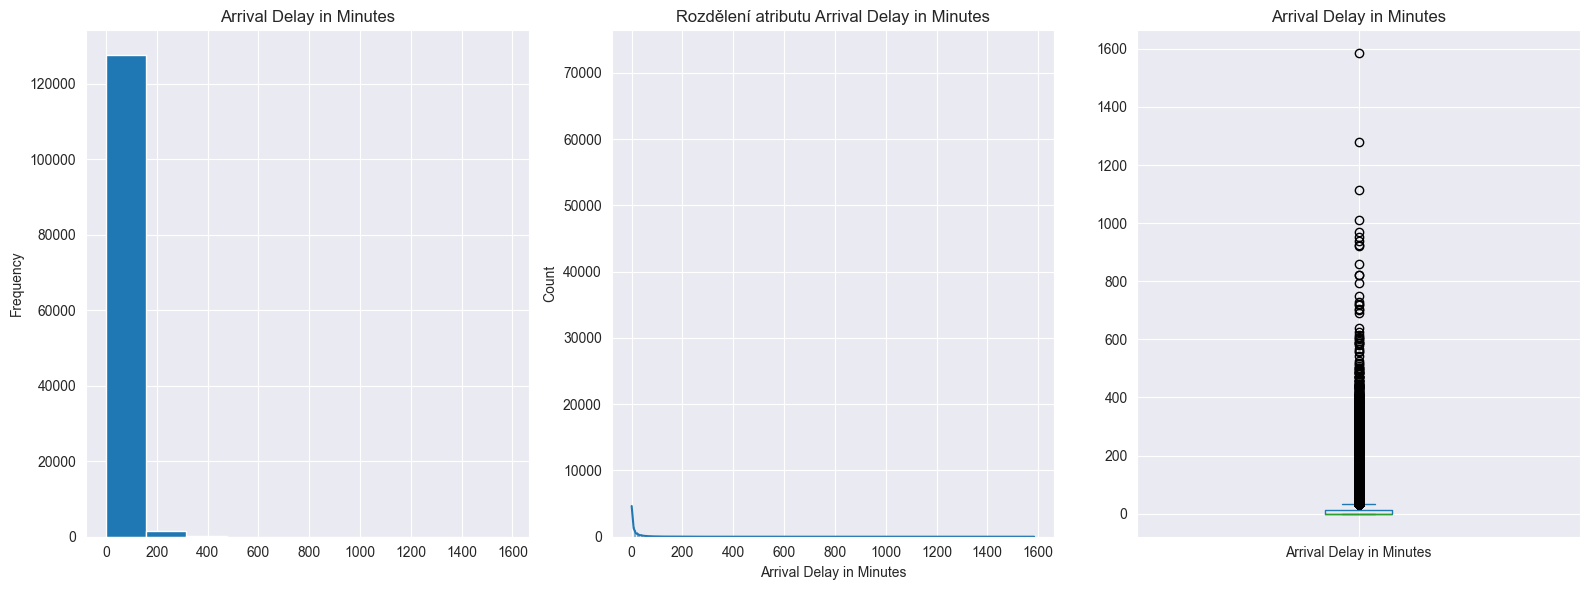

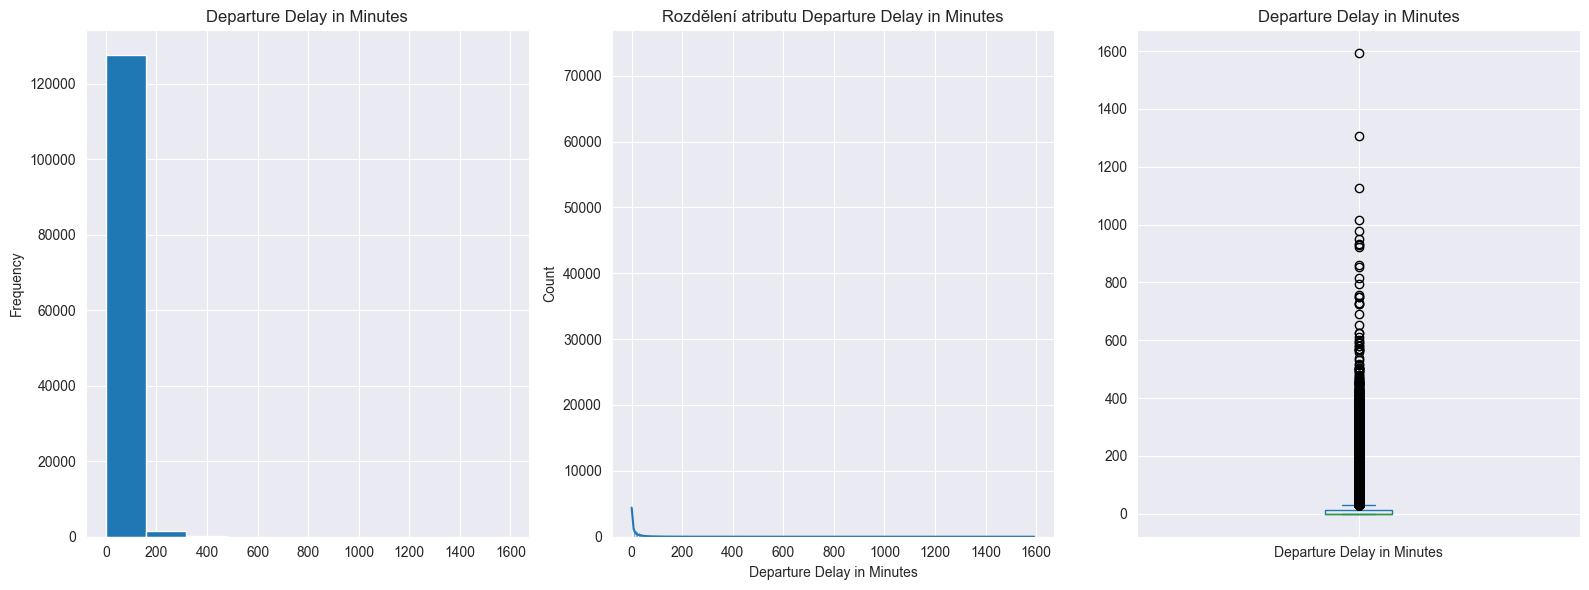

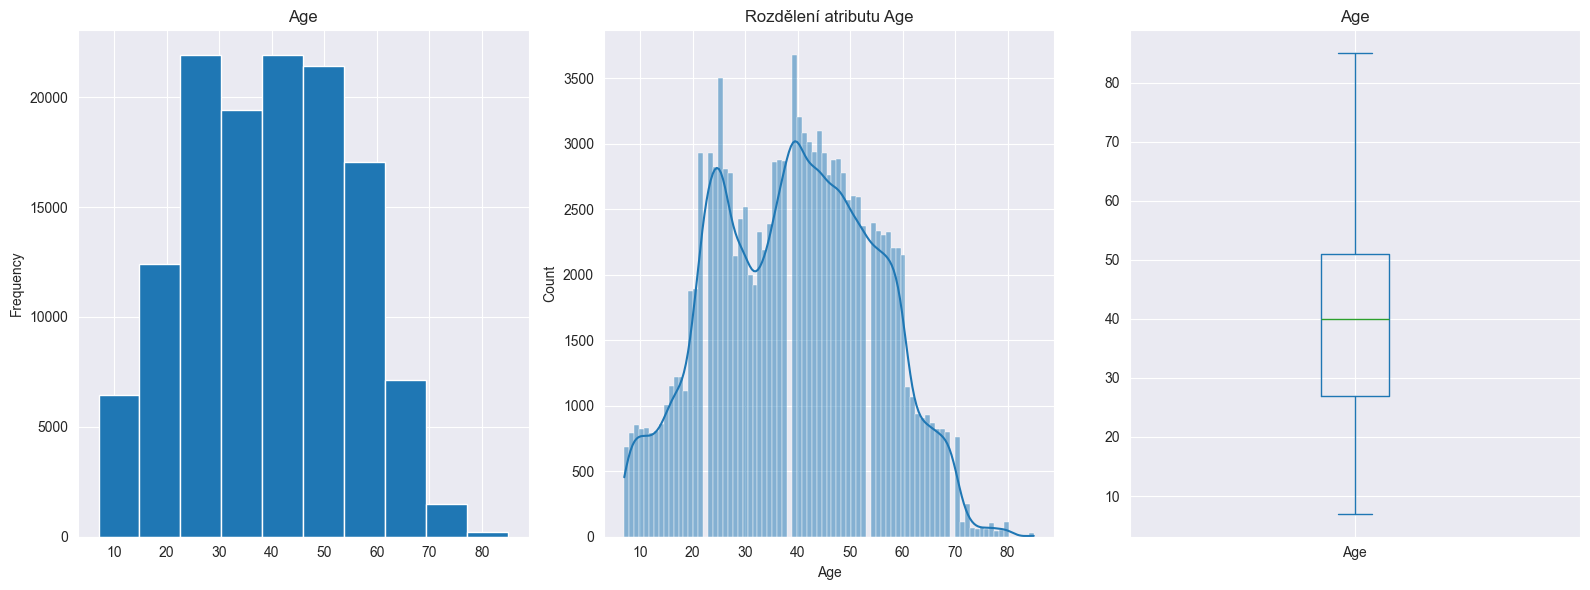

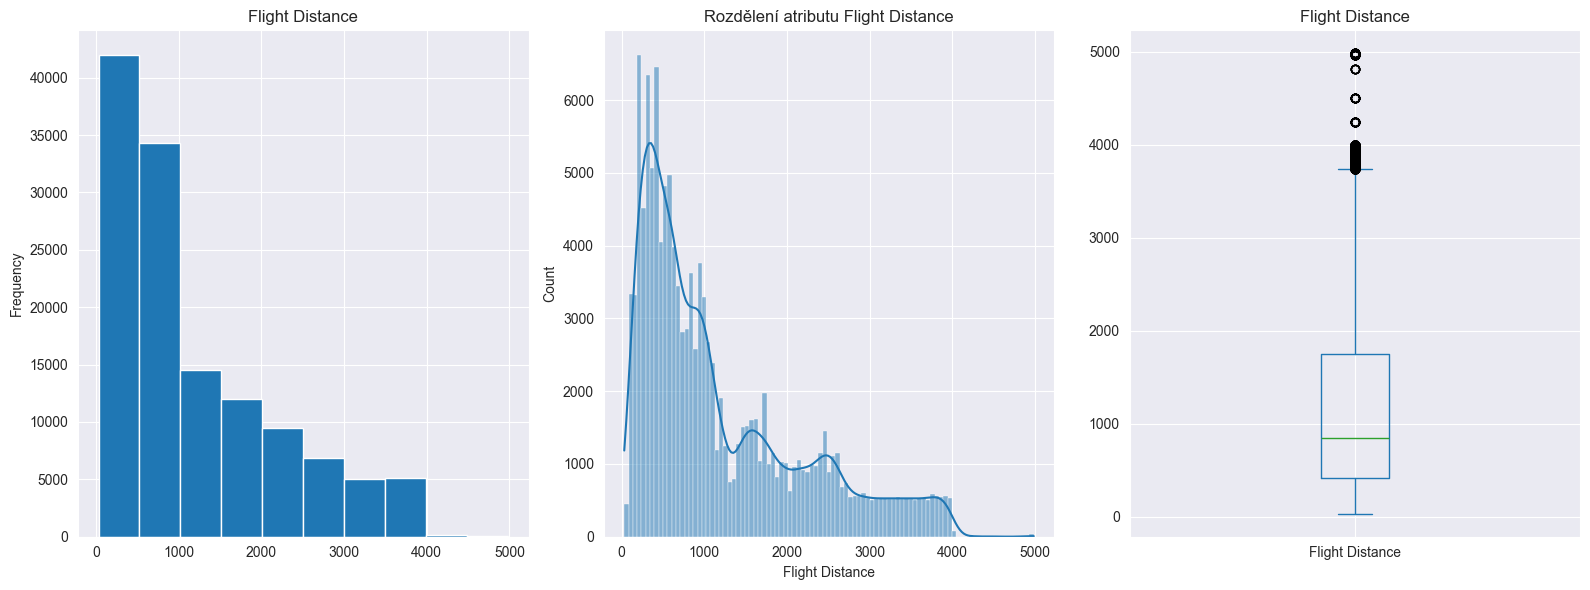

In [22]:
plot_numerical_attributes(df_encoded)

Kromě atributu `Age` všechny atributy obsahují odlehlé hodnoty. Tyto hodnoty mohou být způsobeny chybnými daty nebo mohou být skutečné hodnoty, které by mohly být důležité pro analýzu. Bylo by dobré se na ně podívat a zjistit, zda se jedná o chyby nebo skutečné hodnoty. Vidíme, že u atributů `Arrival Delay in Minutes` a `Departure Delay in Minutes` máme sposty odlehlých hodnot.

#### Odlehlé hodnoty

In [23]:
numerical_outlier_total_count = 0

for i in numerical_categorical_columns:
    if i == "Age":  # from plots, we can see that Age has no outliers
        continue  # hence we will skip this attribute

    df_no_missing = df_encoded.dropna(subset=[i])  # for now, we will drop missing values

    lof = LocalOutlierFactor()
    column_data = df_no_missing[[i]].values.reshape(-1, 1)
    outliers = lof.fit_predict(column_data)
    outlier_list = (outliers == -1).tolist()
    num_outliers = sum(outlier_list)
    numerical_outlier_total_count += num_outliers
    print(f"Počet odelehlých hodnot v {i}: {num_outliers} / "
          f"{len(df_no_missing)} ({(num_outliers / len(df_no_missing) * 100):.2f}%)")

print(f"\nCelkový počet odlehlých hodnot: {numerical_outlier_total_count}")
print(f"Možný počet řádků po odstranění odlehlých hodnot: {len(df_encoded) - numerical_outlier_total_count}, "
      f"což představuje {(numerical_outlier_total_count / len(df_encoded) * 100):.2f}% z celkového počtu záznamů.")

Počet odelehlých hodnot v Arrival Delay in Minutes: 164 / 129487 (0.13%)
Počet odelehlých hodnot v Departure Delay in Minutes: 132 / 129487 (0.10%)
Počet odelehlých hodnot v Flight Distance: 5520 / 129487 (4.26%)

Celkový počet odlehlých hodnot: 5816
Možný počet řádků po odstranění odlehlých hodnot: 123671, což představuje 4.49% z celkového počtu záznamů.


Pojdmě si to vše podrobně prozkoumat.

- **Arrival Delay in Minutes**: Máme *164* odlehlých hodnot, což představuje *0.135%* z celkového počtu záznamů. Data obsahují hodně extrémní hodnoty, které se dost vychylují od průměru. Proto zde odstraníme odlehlé hodnoty.
- **Departure Delay in Minutes**: Máme *171* odlehlých hodnot, což představuje *0.135%* z celkového počtu záznamů. Stejný případ jako u předchozího atributu, odstraníme odlehlé hodnoty.
- **Flight Distance**: Máme *5 504* odlehlých hodnot, což představuje *4.24%* z celkového počtu záznamů. Data jsou poměrně hodně nakloněná doleva, ale suma sumárum se jedná o reálně rozdělená data, která nemají žádné extrémní hodnoty odlehlých hodnot. Proto se nebudeme snažit odstranit žádné hodnoty. Přišli bychom tím o hodně spostu dat, což by mohlo ovlivnit náš výsledek.

In [24]:
columns_to_clean = ["Arrival Delay in Minutes", "Departure Delay in Minutes"]

In [25]:
def remove_outliers(input_df, columns):
    df_func = input_df.copy()

    for index in columns:
        Q1 = df_func[index].quantile(0.25)
        Q3 = df_func[index].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_func = df_func[(df_func[index] >= lower_bound) &
                          (df_func[index] <= upper_bound)]
    return df_func

In [26]:
df_no_outliers = remove_outliers(df_encoded, columns_to_clean)

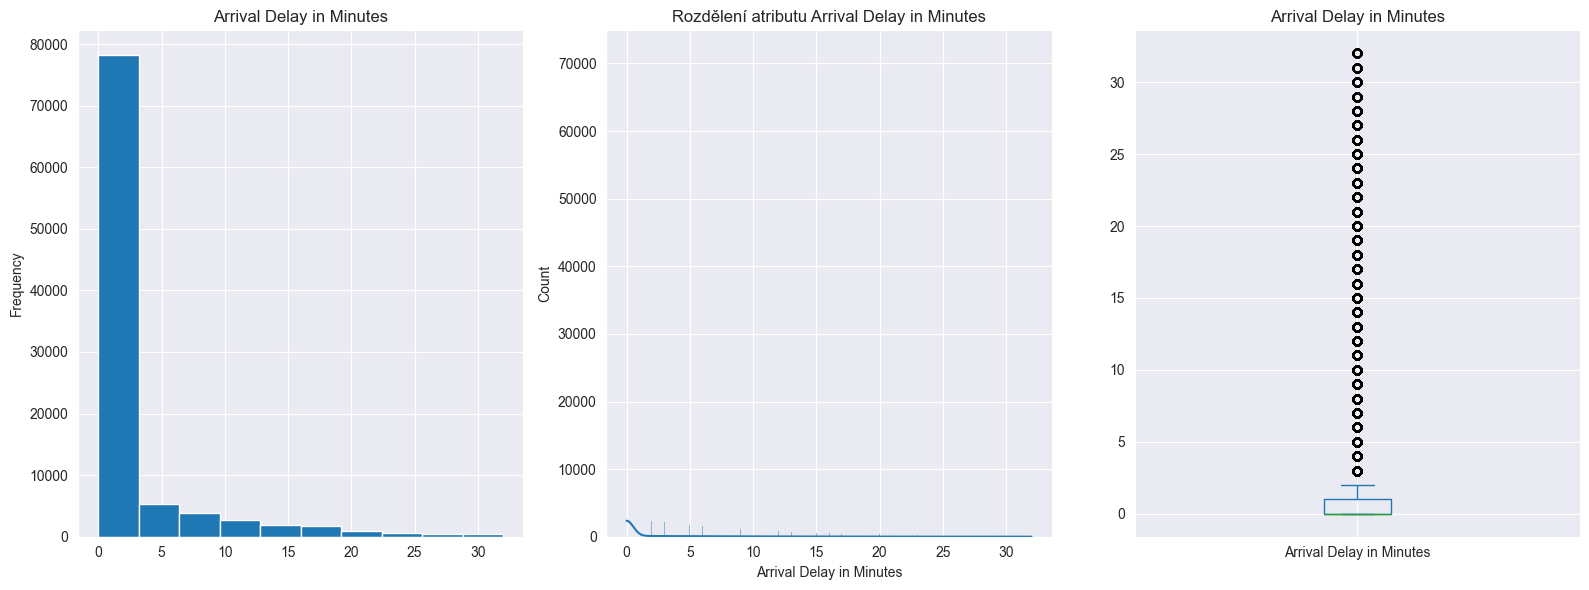

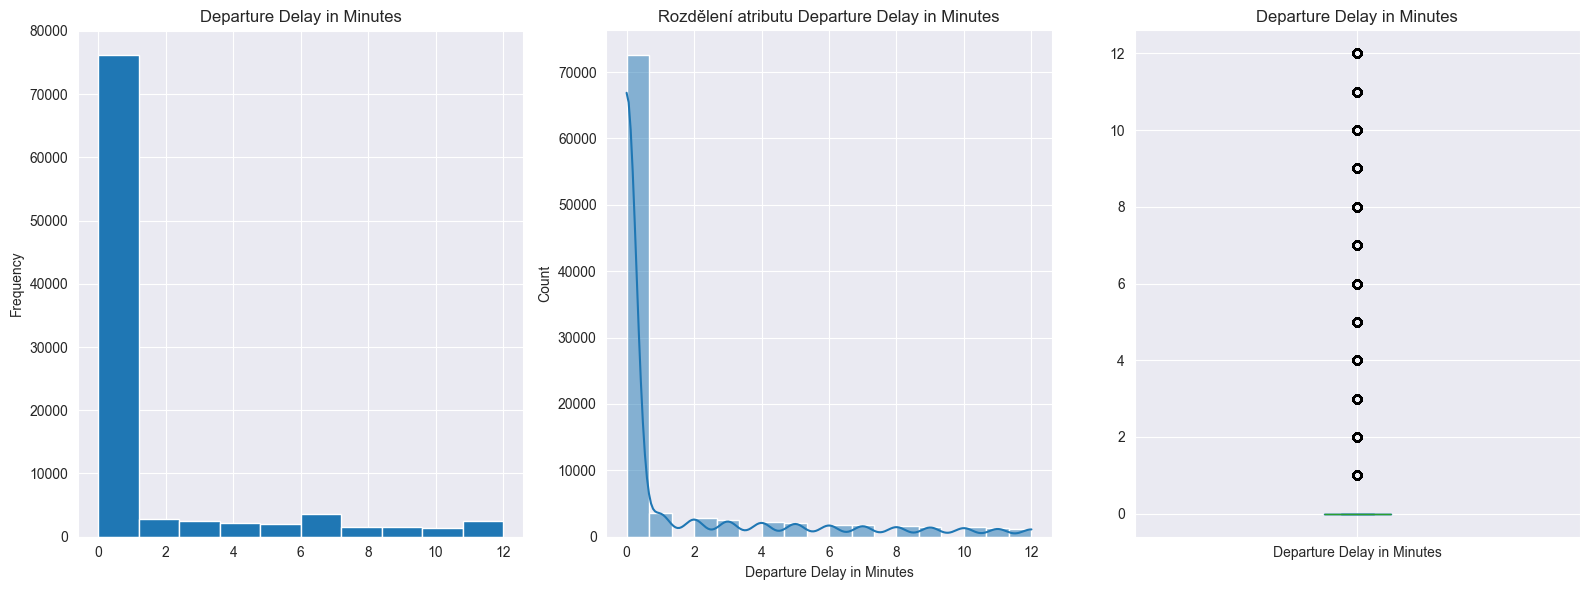

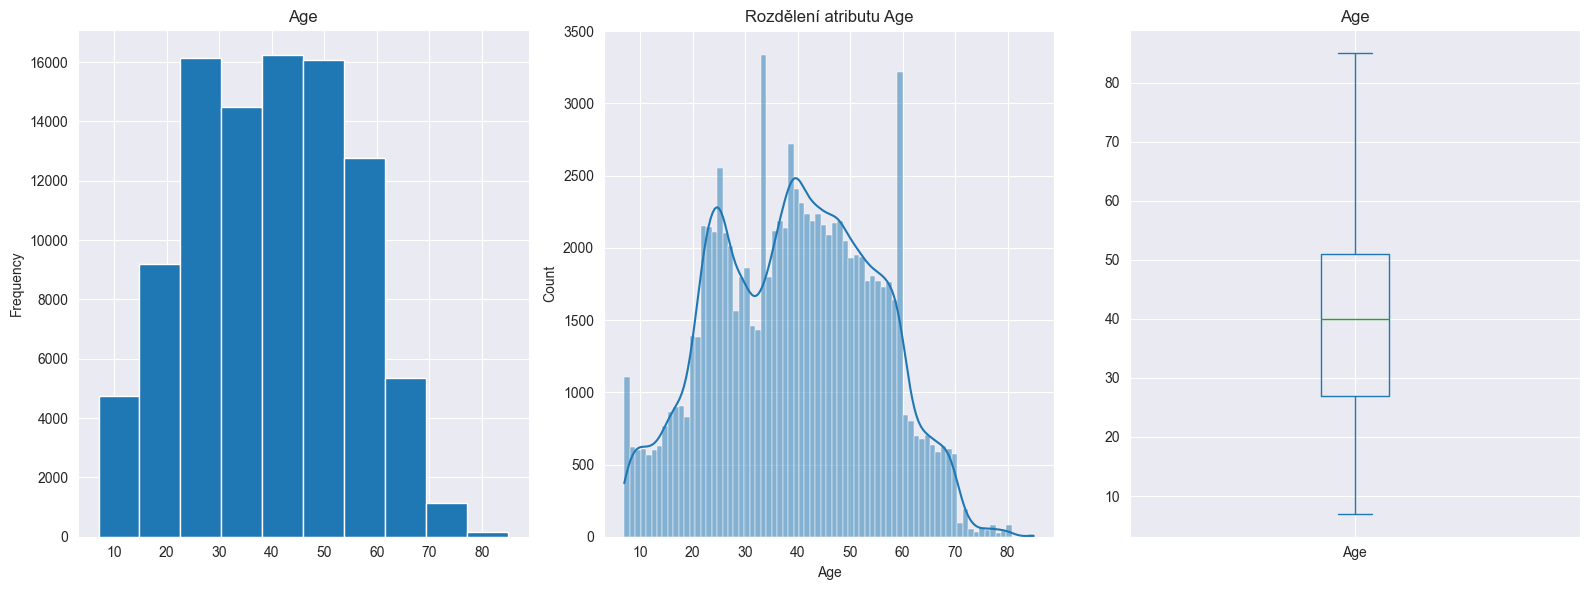

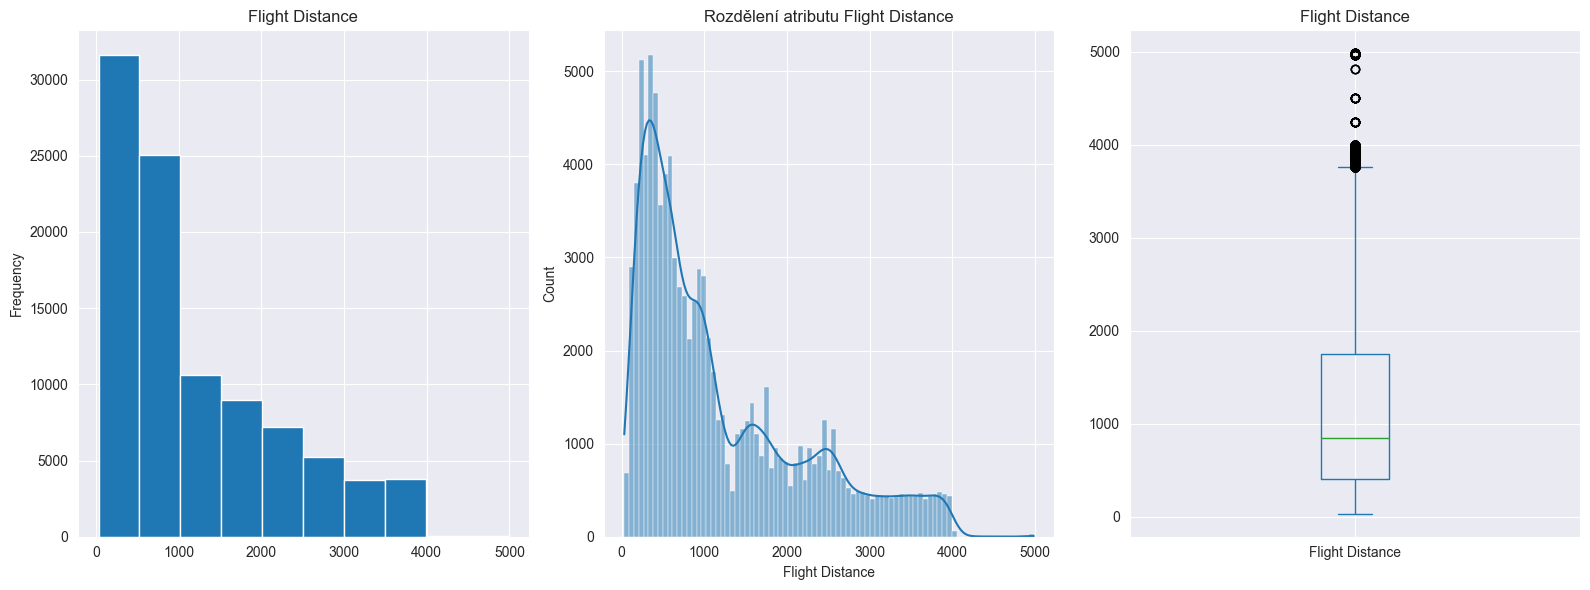

In [27]:
plot_numerical_attributes(df_no_outliers)

Nyní máme odstraněné odlehlé hodnoty z atributů `Arrival Delay in Minutes` a `Departure Delay in Minutes`. Data vypadají mnohem lépe, obzvláště u atributu `Departure Delay in Minutes`, kde jsme měli hodně extrémních hodnot.

### Binární atributy

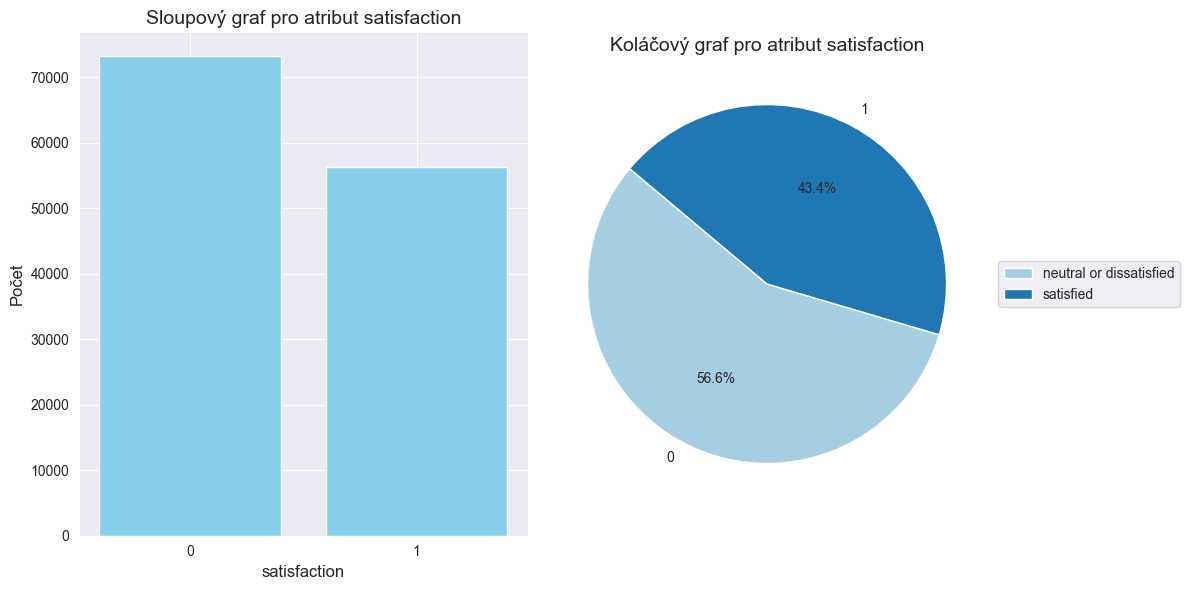

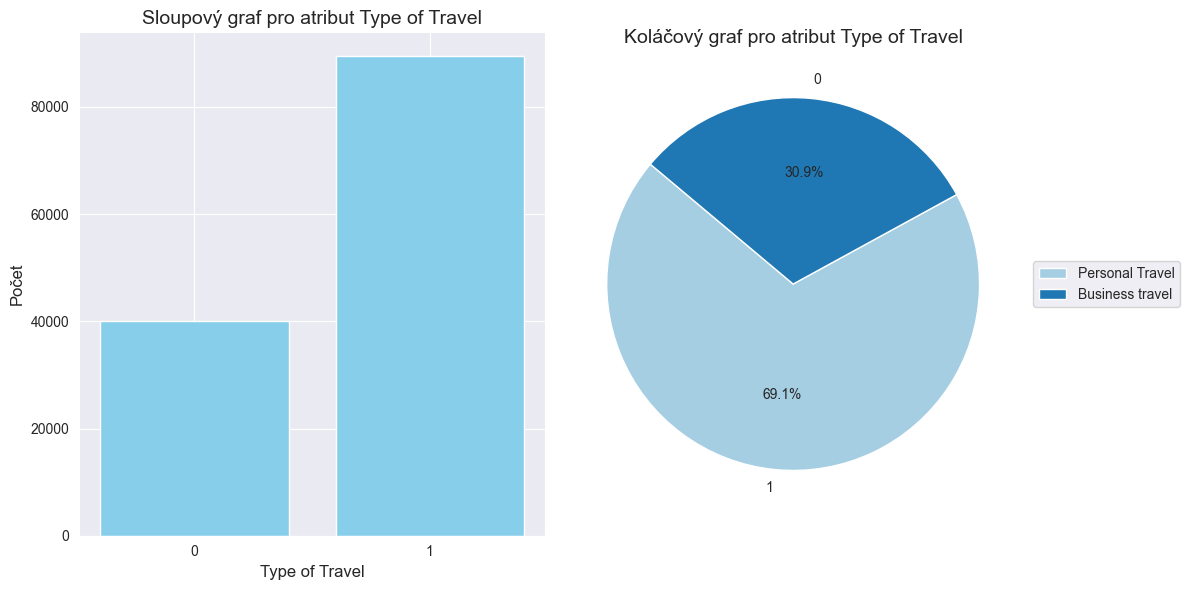

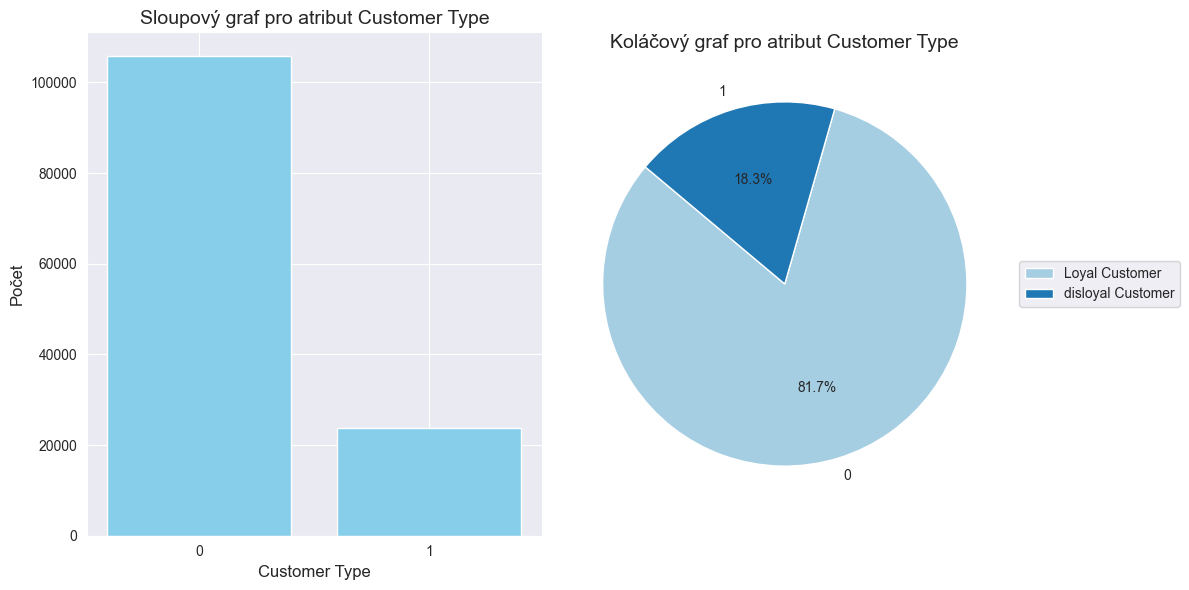

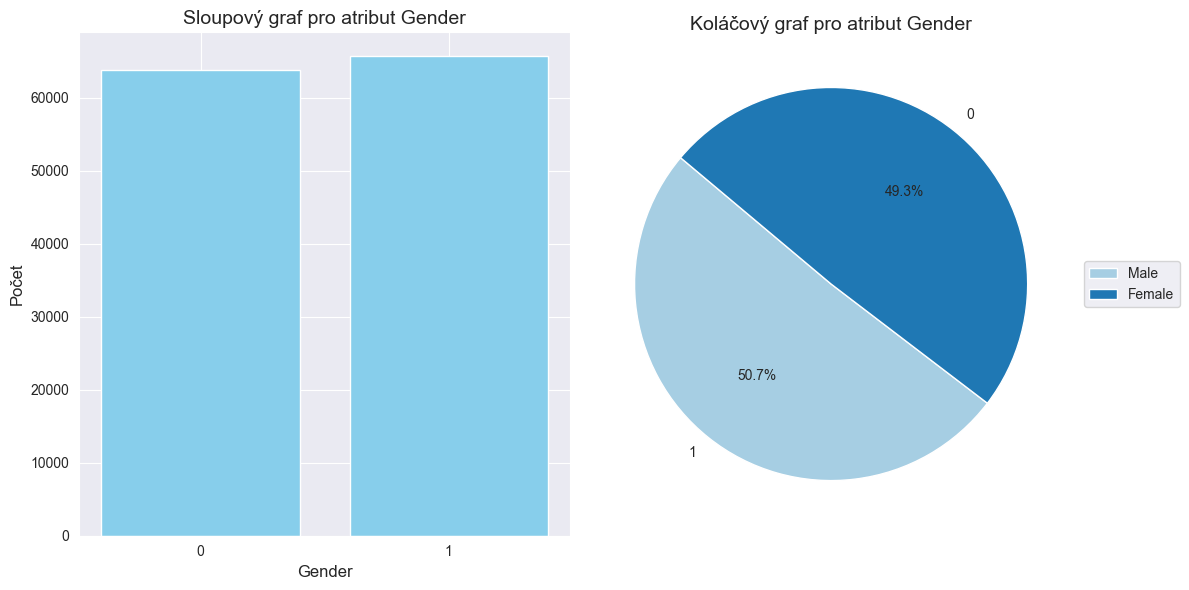

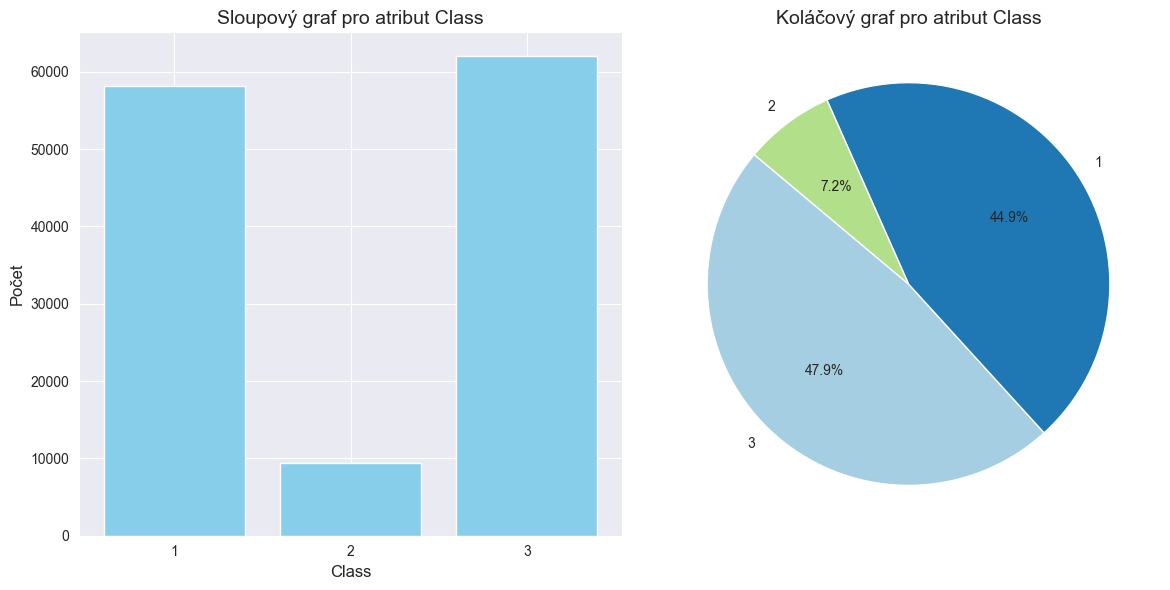

In [28]:
for col in binary_categorical_columns:
    counts = df_encoded[col].value_counts()
    labels = counts.index
    sizes = counts.values

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar plot on the left
    axes[0].bar(labels, sizes, color='skyblue')
    axes[0].set_title(f"Sloupový graf pro atribut {col}", fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel("Počet", fontsize=12)
    axes[0].set_xticks(labels)
    axes[0].tick_params(axis='x')

    # Pie chart on the right
    axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
    axes[1].set_title(f"Koláčový graf pro atribut {col}", fontsize=14)

    if col in categorical_dict_mapping:
        axes[1].legend(labels=[k for k, v in categorical_dict_mapping[col].items()], loc='center left',
                       bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

Tady vše vypadá v pořádku. Některé kategorické atributy jsou nevyrovnané, ale obvykle kategorické atributy nemají takový dopad na shlukování, jako numerické atributy.

### Kategorické atributy

In [29]:
categories_plot_mapping = {
    "0": "Vysoká nespokojenost",
    "1": "Nespokojenost",
    "2": "Neutrální",
    "3": "Spokojenost",
    "4": "Skvělá spokojenost",
    "5": "Nejvyšší spokojenost"
}

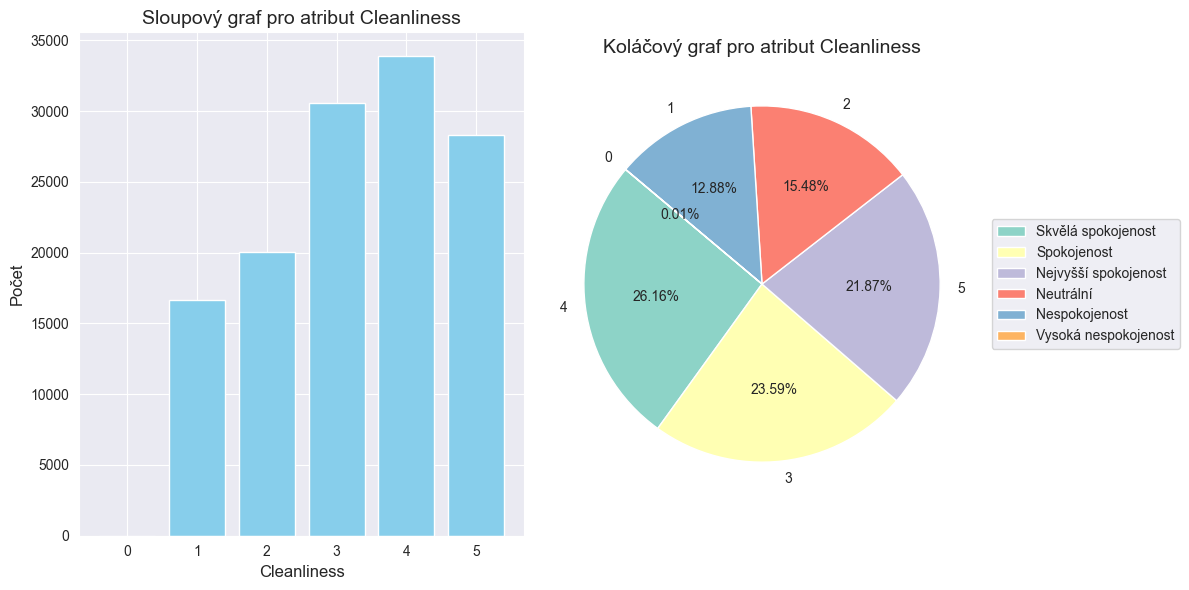

Skvělá spokojenost: 33871 => 26.1578%
Spokojenost: 30552 => 23.5946%
Nejvyšší spokojenost: 28321 => 21.8717%
Neutrální: 20049 => 15.4834%
Nespokojenost: 16680 => 12.8816%
Vysoká nespokojenost: 14 => 0.0108%


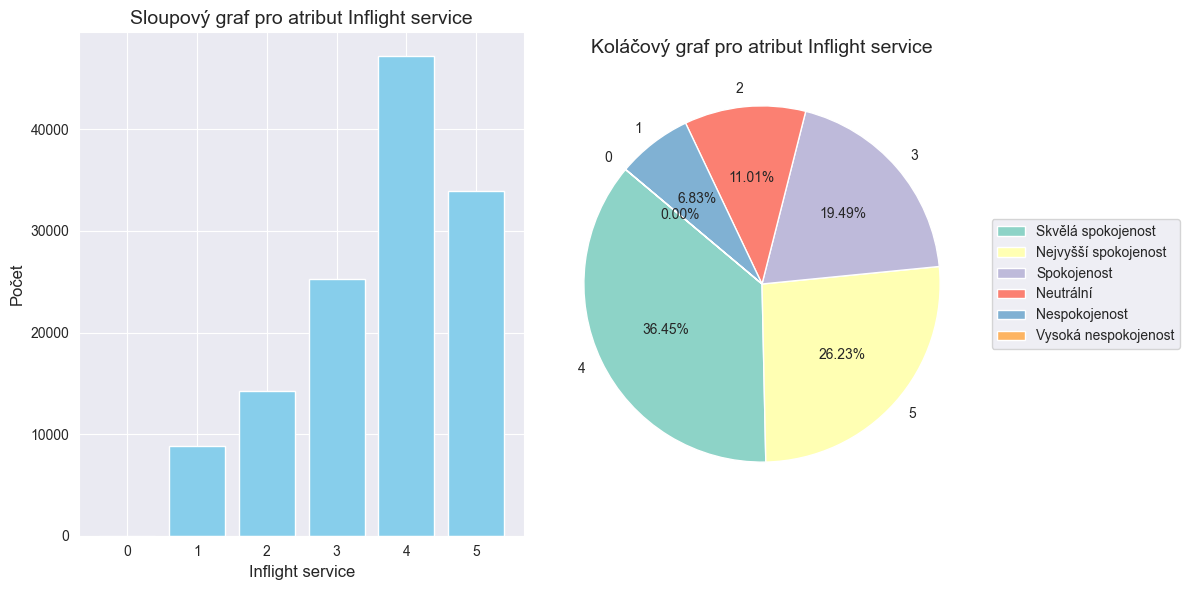

Skvělá spokojenost: 47198 => 36.4500%
Nejvyšší spokojenost: 33962 => 26.2281%
Spokojenost: 25232 => 19.4861%
Neutrální: 14252 => 11.0065%
Nespokojenost: 8838 => 6.8254%
Vysoká nespokojenost: 5 => 0.0039%


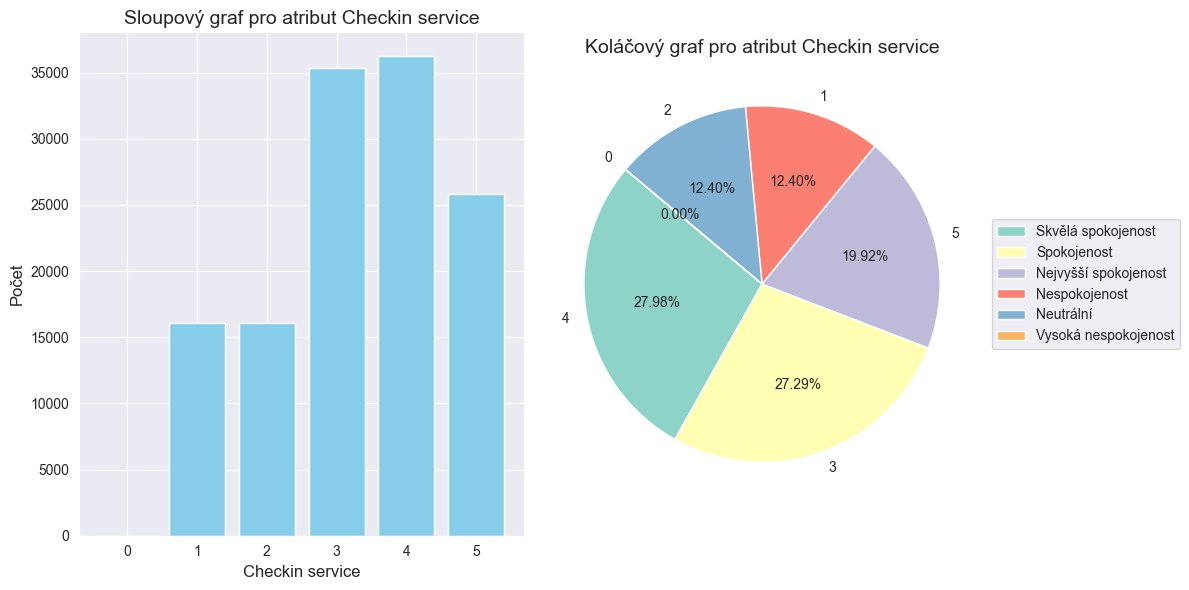

Skvělá spokojenost: 36229 => 27.9789%
Spokojenost: 35343 => 27.2946%
Nejvyšší spokojenost: 25800 => 19.9248%
Nespokojenost: 16058 => 12.4012%
Neutrální: 16056 => 12.3997%
Vysoká nespokojenost: 1 => 0.0008%


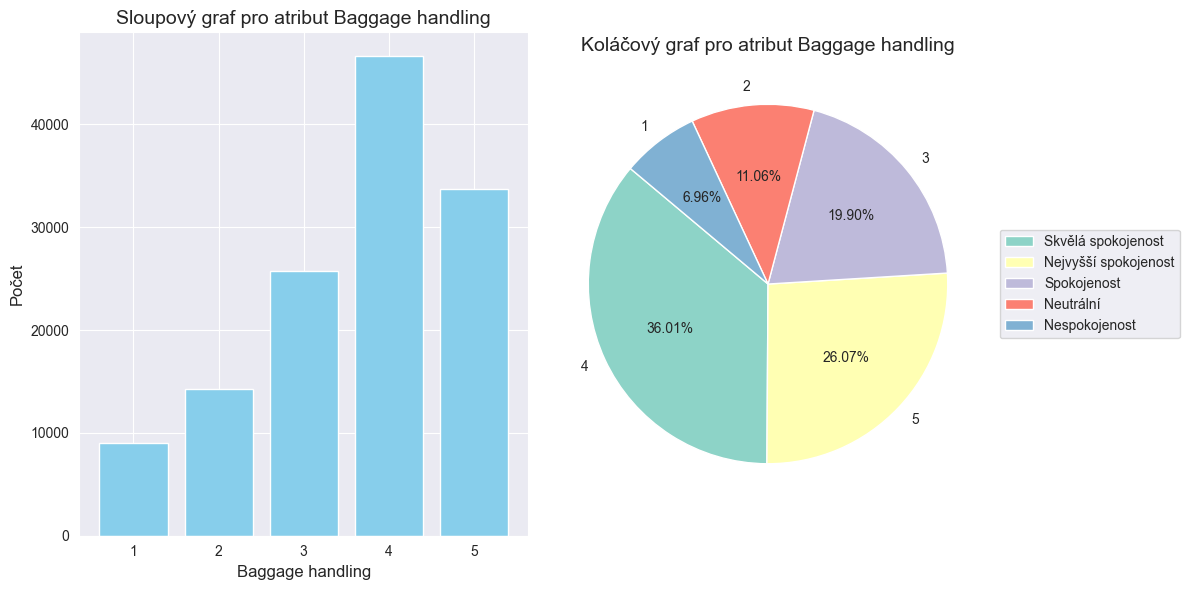

Skvělá spokojenost: 46631 => 36.0121%
Nejvyšší spokojenost: 33761 => 26.0729%
Spokojenost: 25771 => 19.9024%
Neutrální: 14316 => 11.0559%
Nespokojenost: 9008 => 6.9567%


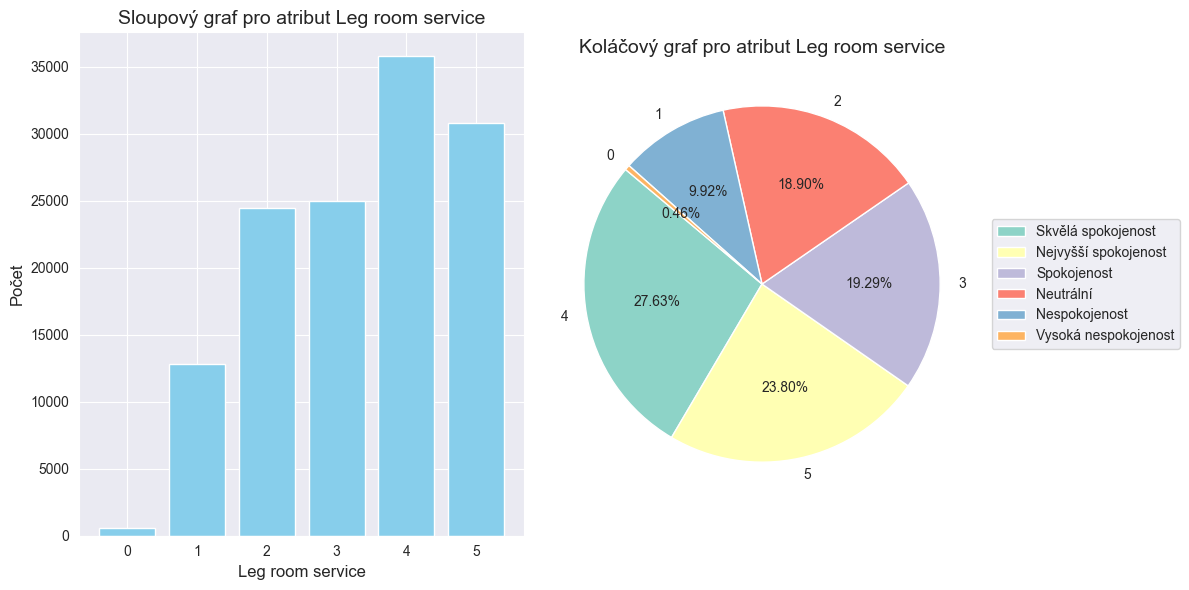

Skvělá spokojenost: 35779 => 27.6313%
Nejvyšší spokojenost: 30815 => 23.7978%
Spokojenost: 24982 => 19.2931%
Neutrální: 24469 => 18.8969%
Nespokojenost: 12846 => 9.9207%
Vysoká nespokojenost: 596 => 0.4603%


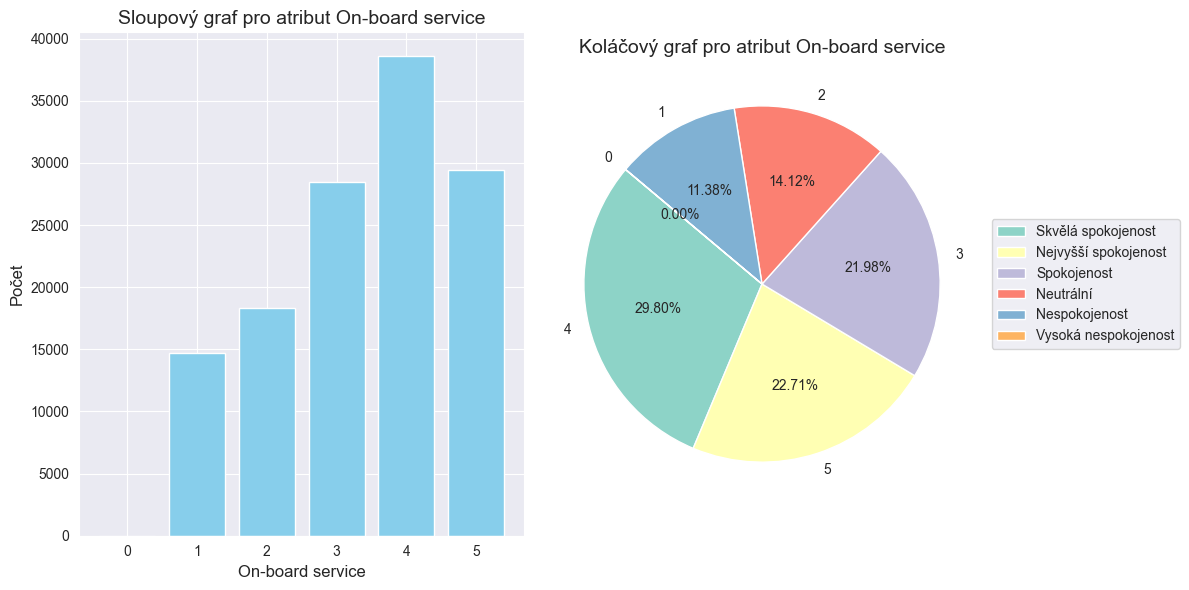

Skvělá spokojenost: 38587 => 29.7999%
Nejvyšší spokojenost: 29407 => 22.7104%
Spokojenost: 28460 => 21.9790%
Neutrální: 18290 => 14.1250%
Nespokojenost: 14738 => 11.3818%
Vysoká nespokojenost: 5 => 0.0039%


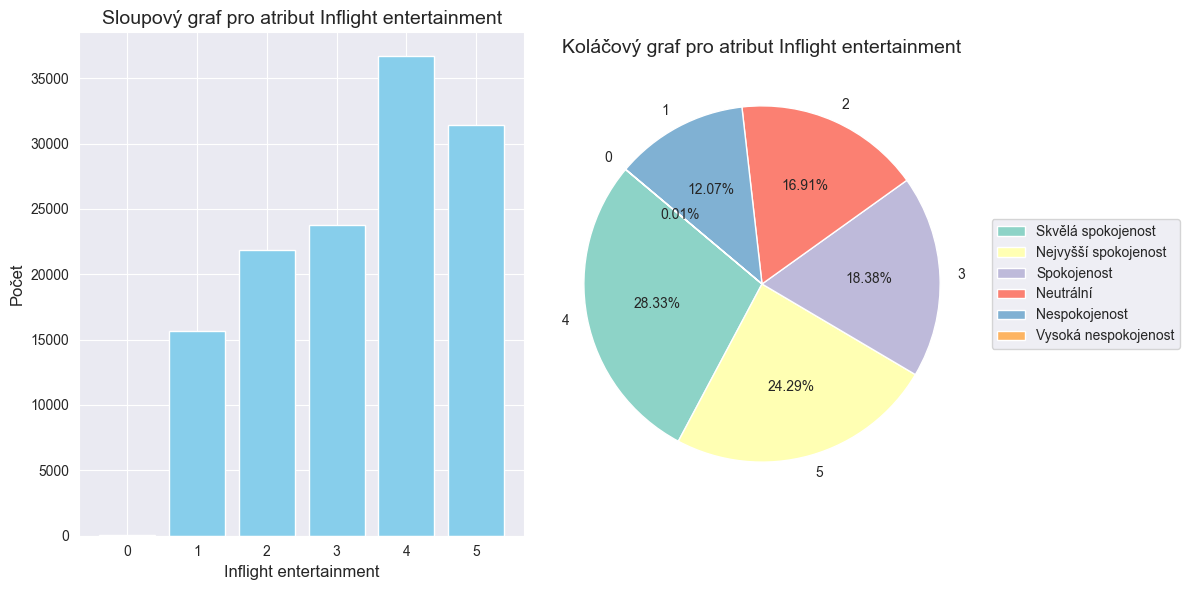

Skvělá spokojenost: 36682 => 28.3287%
Nejvyšší spokojenost: 31451 => 24.2889%
Spokojenost: 23805 => 18.3841%
Neutrální: 21897 => 16.9106%
Nespokojenost: 15634 => 12.0738%
Vysoká nespokojenost: 18 => 0.0139%


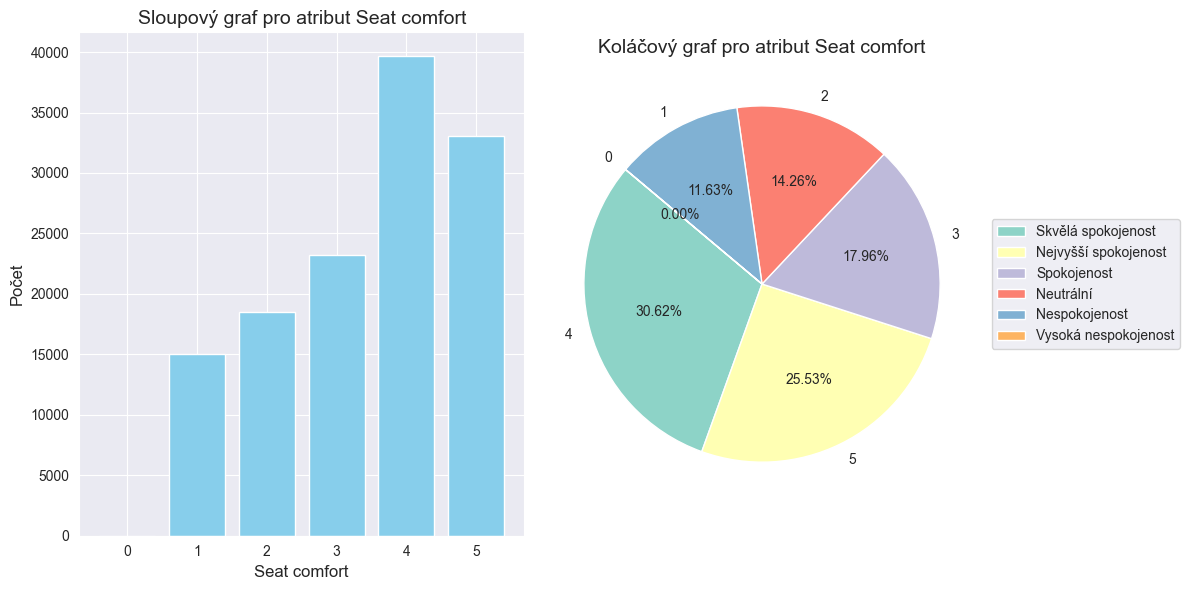

Skvělá spokojenost: 39651 => 30.6216%
Nejvyšší spokojenost: 33056 => 25.5284%
Spokojenost: 23258 => 17.9616%
Neutrální: 18462 => 14.2578%
Nespokojenost: 15059 => 11.6297%
Vysoká nespokojenost: 1 => 0.0008%


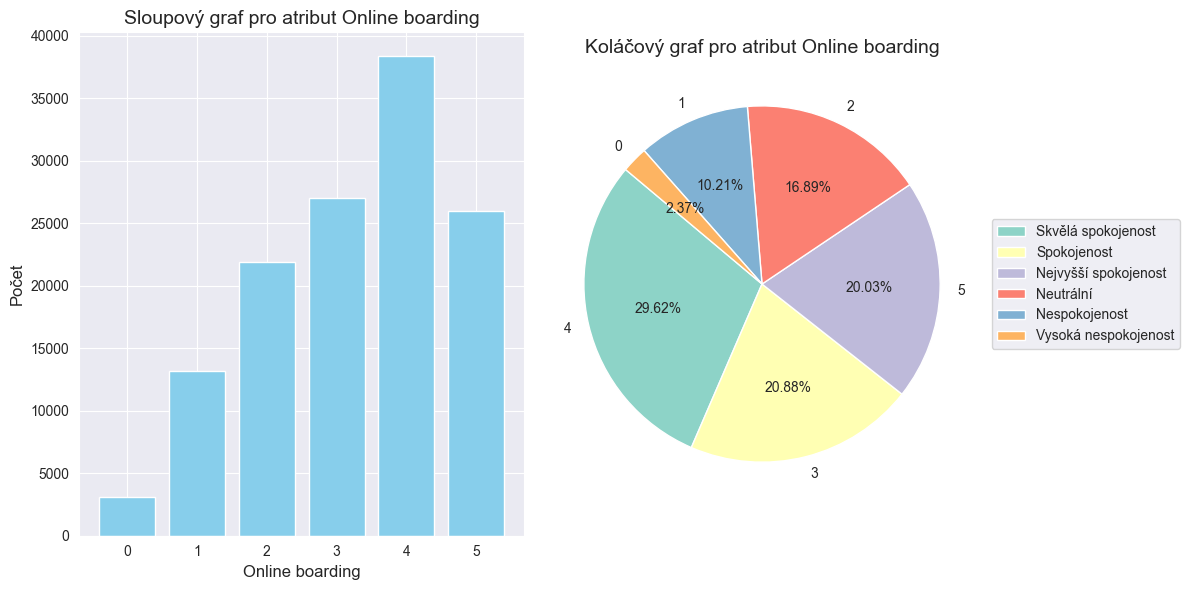

Skvělá spokojenost: 38353 => 29.6192%
Spokojenost: 27040 => 20.8824%
Nejvyšší spokojenost: 25941 => 20.0337%
Neutrální: 21866 => 16.8866%
Nespokojenost: 13216 => 10.2064%
Vysoká nespokojenost: 3071 => 2.3717%


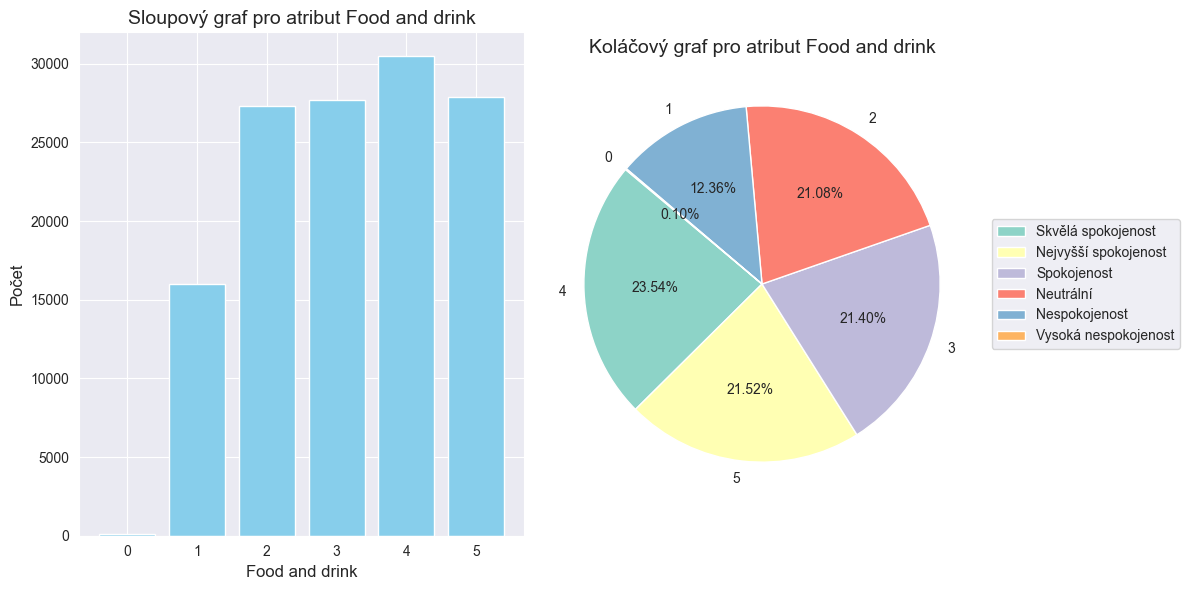

Skvělá spokojenost: 30477 => 23.5367%
Nejvyšší spokojenost: 27865 => 21.5195%
Spokojenost: 27712 => 21.4014%
Neutrální: 27293 => 21.0778%
Nespokojenost: 16010 => 12.3642%
Vysoká nespokojenost: 130 => 0.1004%


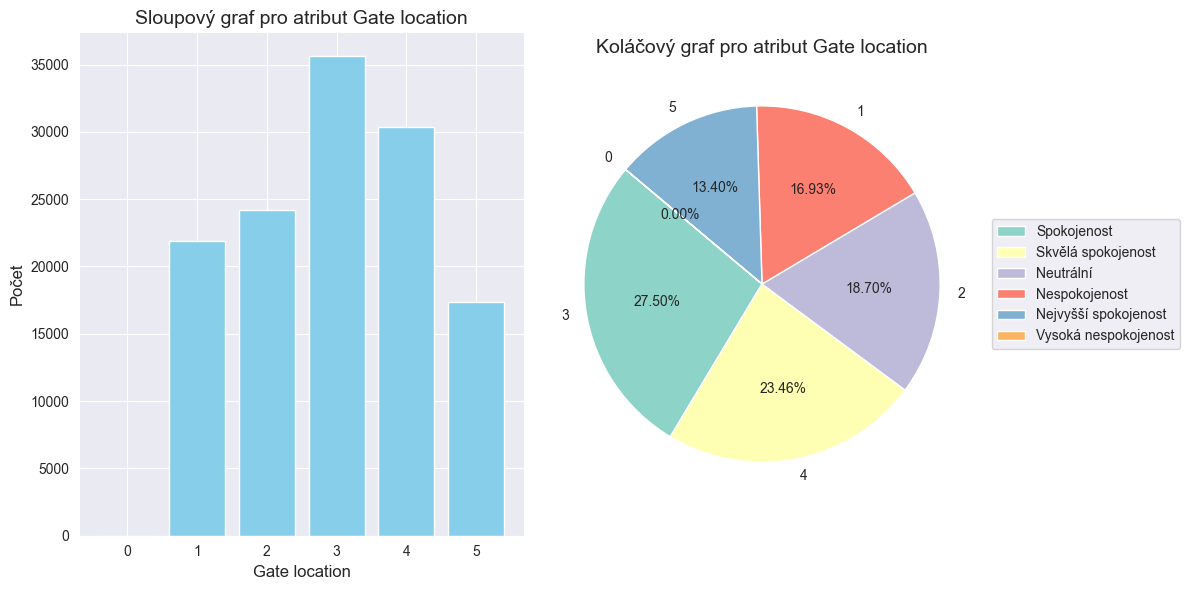

Spokojenost: 35611 => 27.5016%
Skvělá spokojenost: 30376 => 23.4587%
Neutrální: 24219 => 18.7038%
Nespokojenost: 21926 => 16.9330%
Nejvyšší spokojenost: 17354 => 13.4021%
Vysoká nespokojenost: 1 => 0.0008%


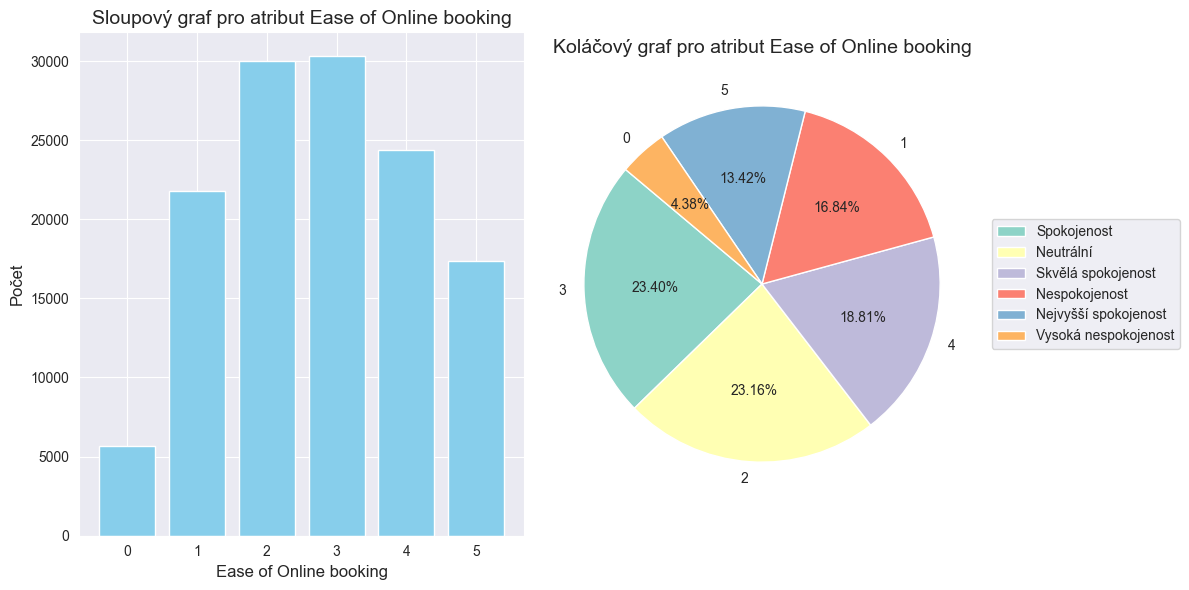

Spokojenost: 30297 => 23.3977%
Neutrální: 29983 => 23.1552%
Skvělá spokojenost: 24362 => 18.8142%
Nespokojenost: 21808 => 16.8418%
Nejvyšší spokojenost: 17371 => 13.4152%
Vysoká nespokojenost: 5666 => 4.3757%


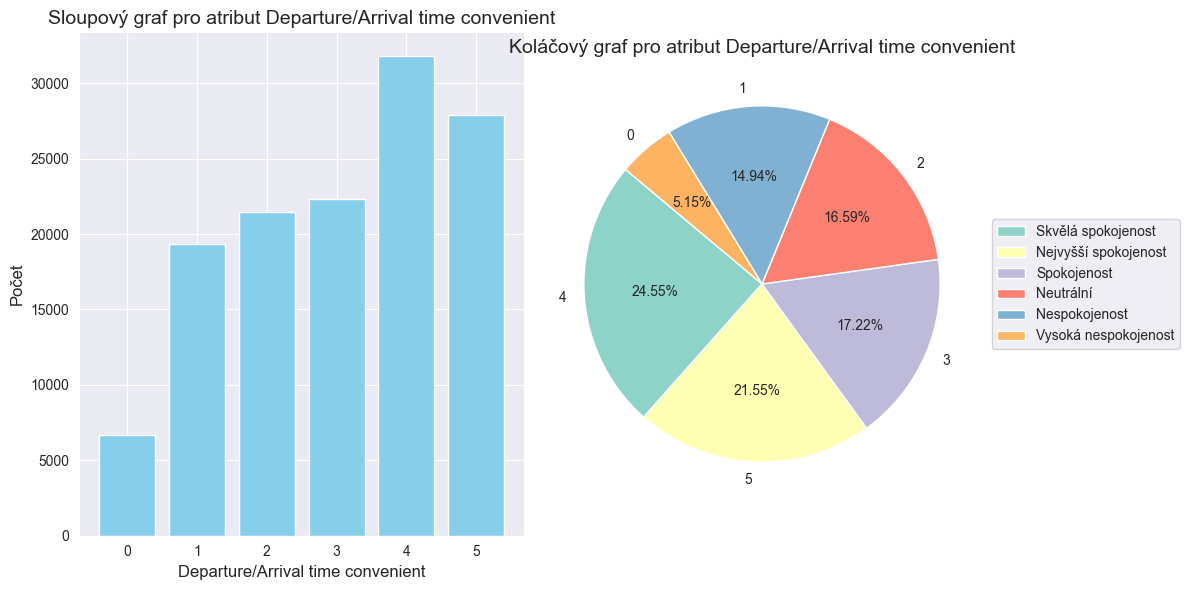

Skvělá spokojenost: 31786 => 24.5476%
Nejvyšší spokojenost: 27906 => 21.5512%
Spokojenost: 22302 => 17.2234%
Neutrální: 21478 => 16.5870%
Nespokojenost: 19351 => 14.9444%
Vysoká nespokojenost: 6664 => 5.1465%


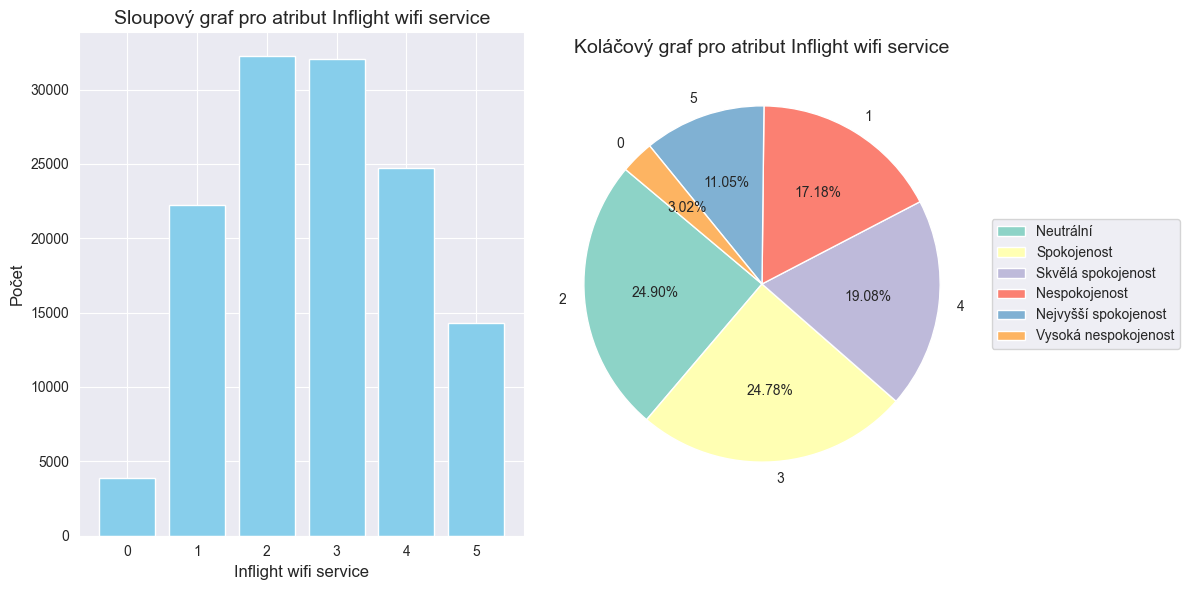

Neutrální: 32236 => 24.8952%
Spokojenost: 32087 => 24.7801%
Skvělá spokojenost: 24702 => 19.0768%
Nespokojenost: 22250 => 17.1832%
Nejvyšší spokojenost: 14304 => 11.0467%
Vysoká nespokojenost: 3908 => 3.0181%


In [30]:
for col in category_categorical_columns:
    counts = df_encoded[col].value_counts()
    labels = counts.index
    sizes = counts.values

    # Sort by size (values in descending order)
    sorted_sizes, sorted_labels = zip(*sorted(zip(sizes, labels), reverse=True))

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar plot on the left
    axes[0].bar(sorted_labels, sorted_sizes, color='skyblue')
    axes[0].set_title(f"Sloupový graf pro atribut {col}", fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel("Počet", fontsize=12)
    axes[0].set_xticks(sorted_labels)
    axes[0].tick_params(axis='x')

    # Pie chart on the right
    num_colors = len(sorted_labels)
    colors = plt.cm.Set3(range(num_colors))

    axes[1].pie(sorted_sizes, labels=sorted_labels, autopct='%1.2f%%', startangle=140,
                colors=colors)
    axes[1].set_title(f"Koláčový graf pro atribut {col}", fontsize=14)

    # Create sorted legend labels from categories_plot_mapping
    legend_labels = [categories_plot_mapping.get(str(label), str(label)) for label in sorted_labels]
    axes[1].legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    for label, size in zip(sorted_labels, sorted_sizes):
        category_name = categories_plot_mapping.get(str(label), str(label))
        print(f"{category_name}: {size} => {(size / len(df_encoded) * 100):.4f}%")

Všechny kategorické atributy vypadají v pořádku. Lidé mají tendence dávat *nulové* hodnocení velmi zřídka, což je pochopitelné, protože by se mělo jednat o extrémní případy. Většina hodnocení se pohybuje v rozmezí mezi *2* a *4*. Hodnocení *5* není rak vzácné, ale spíše časté. Možné vysvětlení je to. že lidé často neměli co vytknout, a tak dali plné hodnocení.

## Škálování numerických dat

_to be continued..._

#  Shluková analýza

_to be continued..._